# Data Preprocessing

In [21]:
# Import necessary libraries
import pandas as pd

# Load your dataset
df = pd.read_csv("C:/Users/Aditya/Downloads/Customer_DF (1).csv")
df

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True
...,...,...,...,...,...,...,...,...,...,...
163,163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True
164,164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True
166,166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True


In [22]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB
None


In [23]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                0
customerEmail             0
customerPhone             0
customerDevice            0
customerIPAddress         0
customerBillingAddress    0
No_Transactions           0
No_Orders                 0
No_Payments               0
Fraud                     0
dtype: int64


In [24]:
# Display summary statistics
print(df.describe())

       Unnamed: 0  No_Transactions   No_Orders  No_Payments
count  168.000000       168.000000  168.000000   168.000000
mean    83.500000         3.708333    2.845238     2.035714
std     48.641546         2.801527    1.981919     2.113240
min      0.000000         0.000000    0.000000     0.000000
25%     41.750000         1.000000    1.000000     1.000000
50%     83.500000         4.000000    3.000000     1.000000
75%    125.250000         5.000000    4.000000     2.000000
max    167.000000        15.000000    8.000000    15.000000


In [25]:
# Handle missing values (if any)
# For example, you can drop rows with missing values
df = df.dropna()
df = df.drop_duplicates()

# Feature Engineering

In [26]:
# Assuming the email provider from the dataset
df['EmailProvider'] = df['customerEmail'].apply(lambda x: x.split('@')[1].split('.')[0])


In [27]:
#Phone number code from which country
df['PhoneCountryCode'] = df['customerPhone'].apply(lambda x: x.split('-')[0])


In [28]:
#Here we are catagorizing the type of ip address
import ipaddress

df['IPType'] = df['customerIPAddress'].apply(lambda x: 'IPv6' if ':' in x else 'IPv4')


In [29]:
#Adding state column
df['State'] = df['customerBillingAddress'].apply(lambda x: x.split()[-2] if len(x.split()) > 1 else None)


In [30]:
df['AvgTransactionsPerOrder'] = df['No_Transactions'] / df['No_Orders']


In [31]:
df['FraudBinary'] = df['Fraud'].astype(int)


In [32]:
df

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,EmailProvider,PhoneCountryCode,IPType,State,AvgTransactionsPerOrder,FraudBinary
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,yahoo,400,IPv4,CA,1.000000,0
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,yahoo,1,IPv4,NM,1.000000,1
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,yahoo,024.420.0375,IPv6,PR,1.666667,0
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,yahoo,670.664.8168x94985,IPv6,FM,1.000000,0
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,malone,1,IPv4,TN,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True,brewer-jones,313,IPv4,OR,1.000000,1
164,164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True,hughes,(250)632,IPv4,AZ,1.200000,1
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True,gmail,635.676.0955x524,IPv6,OK,1.000000,1
166,166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True,jackson-sanders,962.300.2250,IPv4,IL,1.333333,1


# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract features and target variable
X = df[['No_Transactions', 'No_Orders', 'No_Payments']]
y = df['FraudBinary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, dt_predictions)

print('Decision Tree Accuracy:' ,{accuracy_dt})


Decision Tree Accuracy: {0.7647058823529411}


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, rf_predictions)

print('Random Forest Accuracy:' ,{accuracy_rf})


Random Forest Accuracy: {0.7058823529411765}


# Support Vector Machine

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM classifier
svm_classifier = SVC(random_state=42)

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
svm_predictions = svm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, svm_predictions)

print('SVM Accuracy:' ,{accuracy_svm})


SVM Accuracy: {0.6764705882352942}


# K Nearest Neighbour

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Create k-NN classifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
knn_predictions = knn_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, knn_predictions)

print(f'k-NN Accuracy: ', {accuracy_knn})


k-NN Accuracy:  {0.6176470588235294}


C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Comparing the classifications

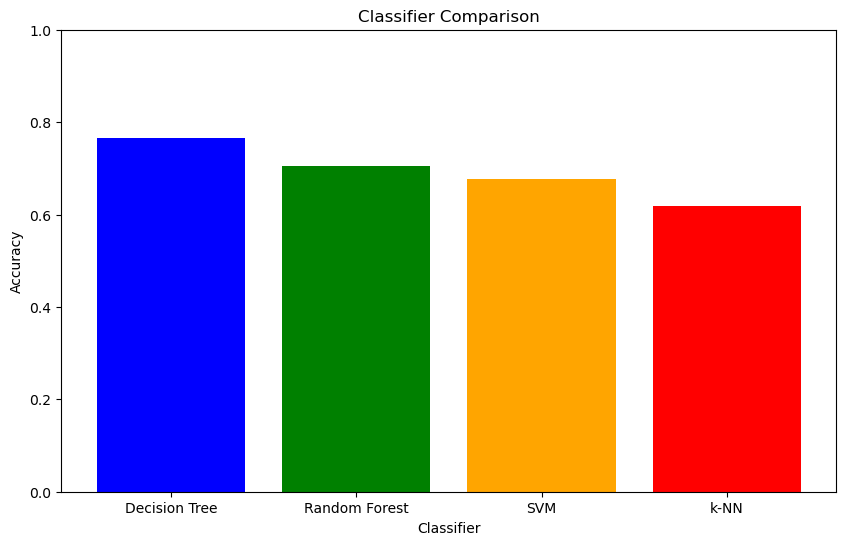

In [37]:
import matplotlib.pyplot as plt

# List of classifiers and their accuracies
classifiers = ['Decision Tree', 'Random Forest', 'SVM', 'k-NN']
accuracies = [accuracy_dt, accuracy_rf, accuracy_svm, accuracy_knn]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()


# Confusion Matrix

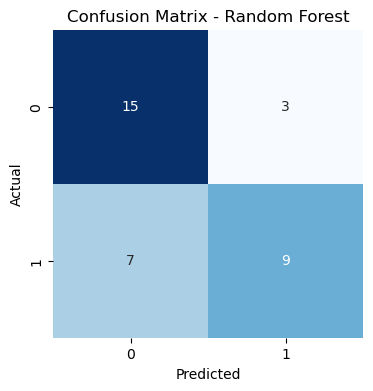


Classification Report - Random Forest:

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        18
           1       0.75      0.56      0.64        16

    accuracy                           0.71        34
   macro avg       0.72      0.70      0.70        34
weighted avg       0.71      0.71      0.70        34



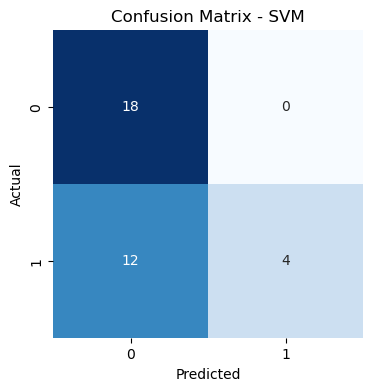


Classification Report - SVM:

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        18
           1       1.00      0.25      0.40        16

    accuracy                           0.65        34
   macro avg       0.80      0.62      0.57        34
weighted avg       0.79      0.65      0.59        34



C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


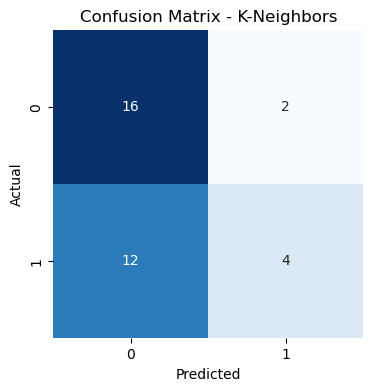


Classification Report - K-Neighbors:

              precision    recall  f1-score   support

           0       0.57      0.89      0.70        18
           1       0.67      0.25      0.36        16

    accuracy                           0.59        34
   macro avg       0.62      0.57      0.53        34
weighted avg       0.62      0.59      0.54        34



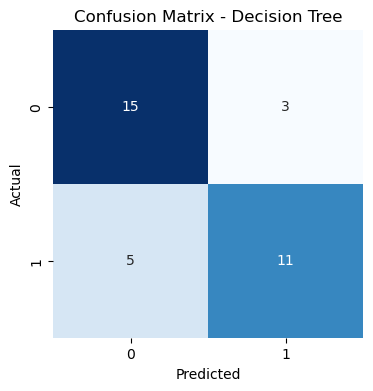


Classification Report - Decision Tree:

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.79      0.69      0.73        16

    accuracy                           0.76        34
   macro avg       0.77      0.76      0.76        34
weighted avg       0.77      0.76      0.76        34



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate classifiers
classifier1 = RandomForestClassifier()
classifier2 = SVC()
classifier3 = KNeighborsClassifier()
classifier4 = DecisionTreeClassifier()


classifiers = ['Random Forest', 'SVM', 'K-Neighbors', 'Decision Tree']

# Train and evaluate classifiers
for i, classifier in enumerate([classifier1, classifier2, classifier3, classifier4]):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {classifiers[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Print classification report
    print(f"\nClassification Report - {classifiers[i]}:\n")
    print(classification_report(y_test, y_pred))
    print("="*60)


# AUC ROC CURVE

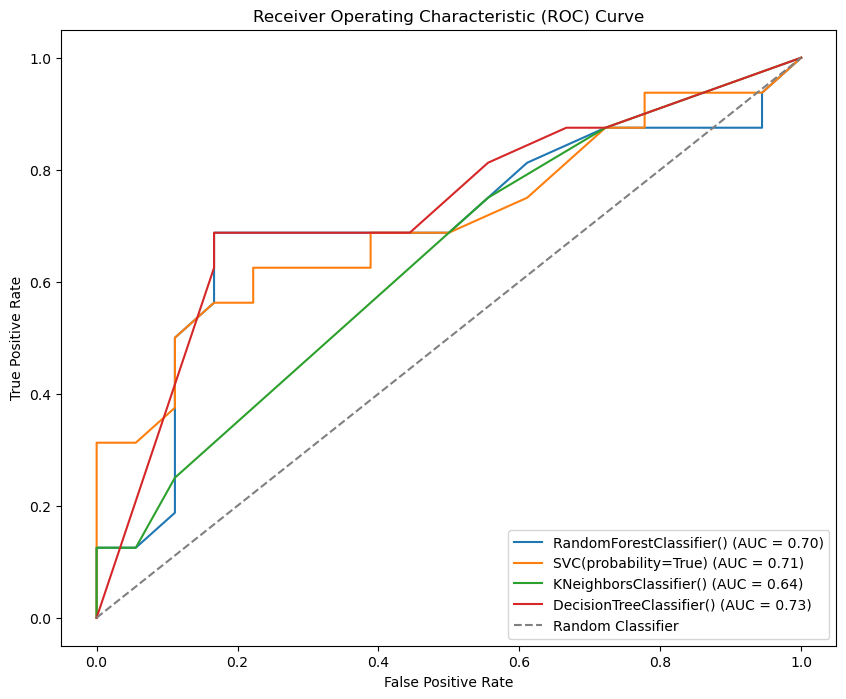

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Instantiate classifiers
classifier1 = RandomForestClassifier()
classifier2 = SVC(probability=True)
classifier3 = KNeighborsClassifier()
classifier4 = DecisionTreeClassifier()

classifiers = [classifier1, classifier2, classifier3, classifier4]

# Plot ROC curve and calculate AUC for each classifier
plt.figure(figsize=(10, 8))
for i, classifier in enumerate(classifiers):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_prob = classifier.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{classifiers[i]} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [44]:
import pandas as pd

# Assuming 'data' contains your dataset
# You can load your dataset into a DataFrame like this:
# data = pd.read_csv('your_dataset.csv')

# Separate normal transactions and fraud transactions
normal_transactions = df[df['Fraud'] == False]
fraud_transactions = df[df['Fraud'] == True]

# Print the first few rows of each dataframe to verify
print("Normal Transactions:")
print(normal_transactions.head())

print("\nFraud Transactions:")
print(fraud_transactions.head())
print(sum(df['Fraud']))
print(sum(df['Fraud']==False))

Normal Transactions:
    Unnamed: 0              customerEmail       customerPhone  \
0            0     josephhoward@yahoo.com        400-108-5415   
2            2  andersonwilliam@yahoo.com        024.420.0375   
3            3      rubenjuarez@yahoo.com  670.664.8168x94985   
8            8  jameslandry@rodriguez.com  1-885-168-1310x338   
11          11       ksummers@hotmail.com      1-023-275-4692   

          customerDevice                        customerIPAddress  \
0   yyeiaxpltf82440jnb3v                             8.129.104.40   
2   4m7h5ipl1shyavt6vv2r  67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0   
3   slovx60t0i558may4ks0  95de:8565:5a66:792c:26e0:6cfb:7d87:11af   
8   yz4l2bgbvzra5eb5qcan  c899:ff67:6864:4365:def3:3023:655f:5181   
11  2ngkzu1idwxintmxwmgn                             184.97.57.11   

                               customerBillingAddress  No_Transactions  \
0             5493 Jones Islands\nBrownside, CA 51896                2   
2      8478 Sean Ridges A

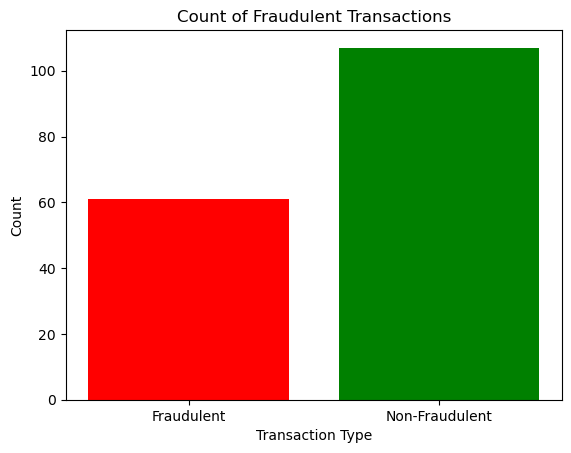

In [42]:
import matplotlib.pyplot as plt

# Count the number of fraudulent transactions
fraud_count = len(fraud_transactions)
# Count the number of non-fraudulent transactions
non_fraud_count = len(normal_transactions)

# Create a bar plot
plt.bar(['Fraudulent', 'Non-Fraudulent'], [fraud_count, non_fraud_count], color=['red', 'green'])
plt.title('Count of Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()
